# Evaluation

The goal of this lab is to introduce you to techniques for evaluating your trained models. The motivation is to be able to select the model that has the best (expected) out-of-sample prediction and to assess the quality of the model.

## 1. Model Selection in a holdout setting

We will work with the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a> data set. The iris data set consists out of $4$ features (sepal length, sepal width, petal length, petal width) of three kinds of flowers in the iris family: iris setosa, iris versicolor, iris virginica. Our version of the data set has 150 data points with 50 for each class.

In [121]:
# Load the data
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
print('Loaded {} data points'.format(len(iris.data)))

X, y = iris.data, iris.target

print('Class labels: {}'.format(list(zip(range(3), iris.target_names))))
print(X)
print(y)

Loaded 150 data points
Class labels: [(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2

We try to classify the iris versicolor with the help of the first two features.

In [122]:
import numpy as np

X_versi = X[:, :2] 
y_versi = np.zeros(len(y))
y_versi[y == 1] = 1
print(X_versi[y_versi == 1, 0])
print(y_versi)

[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


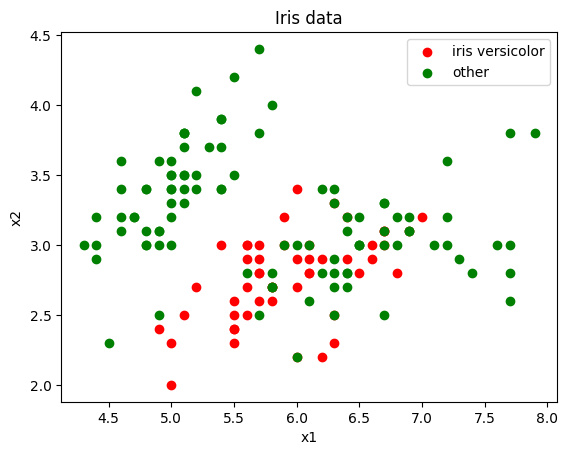

In [123]:
# plot iris data with two features
plt.scatter(X_versi[y_versi == 1, 0], X_versi[y_versi == 1, 1], c='red', label='iris versicolor') 
# y == 1, and X_versi[:, 0] is the first feature, X_versi[:, 1] is the second feature
plt.scatter(X_versi[y_versi == 0, 0], X_versi[y_versi == 0, 1], c='green', label='other')
# y == 0, and X_versi[:, 0] is the first feature, X_versi[:, 1] is the second feature
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Iris data')
plt.legend()

We split the data into a train and test (holdout) set with a split ratio of 75% to 25%.

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_versi, y_versi, test_size=0.25, random_state=3)

The following function is a little visualization helper that draws the values of the decision function on a heat map given a matplotlib axe.

classifier decision boundery 시각화


In [125]:
def show_decision_function(clf, ax):
    xx, yy = np.meshgrid(np.linspace(4.5, 8, 200), np.linspace(1.5, 4.0, 200)) # x축과 y축을 위한 메쉬 그리드 생성
    # classifier의 예측 확률 또는 결정 함수 계산
    try:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0] # predict_proba 메서드를 사용하여 각 점의 클래스 0에 대한 예측 확률을 계산
        # 이 메서드는 일부 분류기에서만 사용할 수 있음
    except AttributeError:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        # predict_proba 메서드가 없는 경우 decision_function 메서드를 사용하여 결정 점수를 계산

        

    Z = Z.reshape(xx.shape) # # 결과를 메쉬 그리드 형태로 재구성
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.jet) # # 결정 경계를 색으로 시각화
    
    ax.set_xlim(4.5, 8) # x축과 y축의 범위 설정
    ax.set_ylim(1.5, 4.0)
    
    ax.set_xticks(())   # x축과 y축의 눈금 제거
    ax.set_yticks(())
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100)    # 학습 데이터 포인트를 그래프에 산점도로 표시

We now train a SVM classifier on the training data and plot its decision boundary.

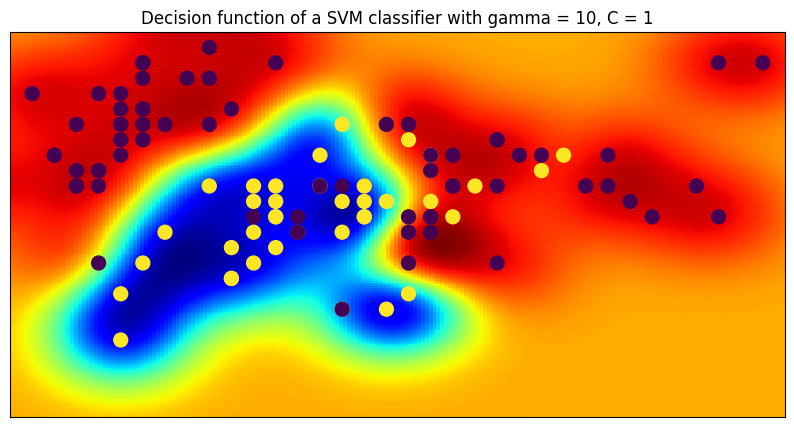

In [126]:
from sklearn.svm import SVC

clf_svm = SVC(gamma=10, C=1, probability=True)
clf_svm.fit(X_train, y_train)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
show_decision_function(clf_svm, ax)
ax.set_title('Decision function of a SVM classifier with gamma = 10, C = 1');

#### Exercise 1.1 (Performance measures)
Classify the test data and evaluate the classification performance of the trained model 'clf_svm' using the scikit-learn metrics package. Compare various metrics (classification accuracy, precision, recall, f-score), interpret their values and argue which of them might be the most meaningful to report.

In [127]:
from sklearn import metrics

predict = clf_svm.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, predict))
print("Precision: ", metrics.precision_score(y_test, predict))
print("Recall: ", metrics.recall_score(y_test, predict))
print("F1 score: ", metrics.f1_score(y_test, predict))




Accuracy:  0.7631578947368421
Precision:  0.6666666666666666
Recall:  0.5
F1 score:  0.5714285714285714


Recall and precision are two metrics that have a trade-off relationship with each other, so it is difficult to increase them together. However, if both are above 0.5, the model's performance is not bad. 

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

But, since the accuracy is not that high at 0.76, the model's performance cannot be said to be that good.

The f1 score is calculated from the harmonic mean, and can accurately evaluate model performance when labels are unbalanced. He doesn't look that good either.

#### Exercise 1.2 (ROC curve)

To further evaluate the model, we want to plot a ROC (Receiver operating characteristic) curve and look at the AUC (area under the curve) value. Therefore, we provide a function "plot_roc_curves" that accepts increasing false positive rates (fprs) and true positive rates (tprs) and plots the curve for you. 

Please calculate the false and true positive rates of the classifier 'clf_svm' on the test data 'X_test' and draw the ROC curve by executing the function 'plot_roc_curves'. What does the ROC and AUC tell us about the classifier's performance?

In [128]:
# helper to plot ROC curves
def plot_roc_curves(fprs, tprs):    
    fig = plt.figure(figsize=(20,10))
    
    for fpr, tpr in zip(fprs, tprs):
        plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % metrics.auc(fpr, tpr))
        # 주어진 FPRs와 TPRs 리스트를 반복합니다. 각 반복에서, FPR과 TPR의 쌍에 대한 ROC 곡선을 그립니다
    
    plt.plot([0, 1], [0, 1], 'k--') # 0,0에서 1,1까지 대각 점선을 그립니다
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

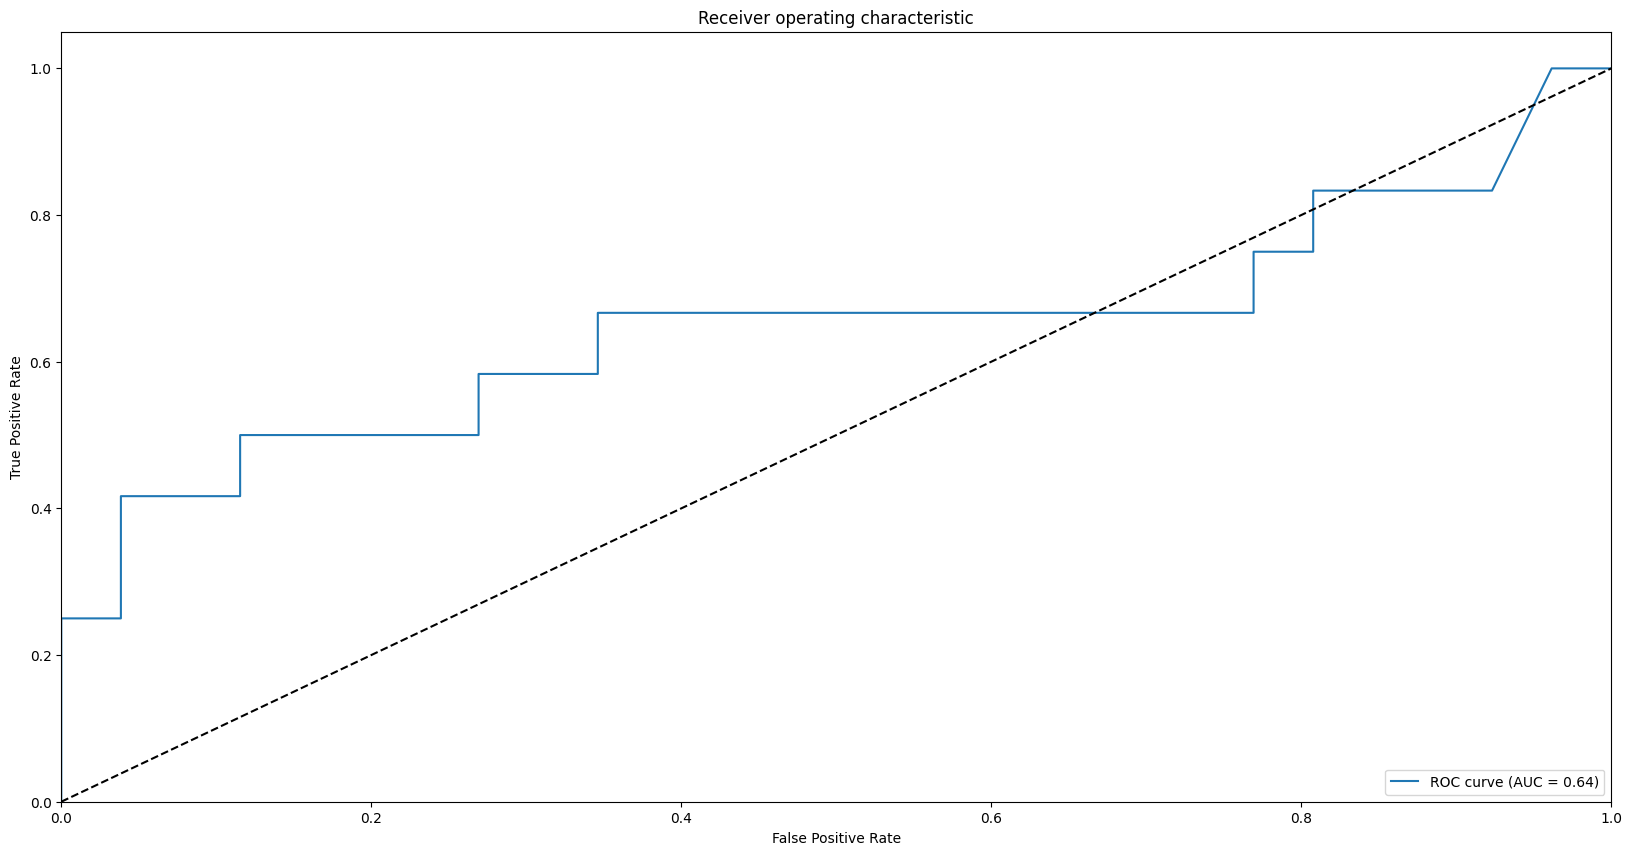

In [129]:
from sklearn.metrics import roc_curve

predict = clf_svm.predict_proba(X_test ) 
# decision_function()은 각 샘플이 양성 클래스에 속할 점수를 계산. 주로 ROC에 사용
# pred_prob = clf_svm.predict_proba(X_test)[:, 1] # 각 샘플이 양성 클래스에 속할 확률을 계산. 주로 AUC에 사용. 근데 여기서도 쓸 수 있다. 결과는 똑같음.
# 종종 threshold를 설정하거나 변경해야할 수 있다. 이를 위해 predict_proba 대신 decision_function을 사용한다.
# descision_function은 임계값을 0으로 설정한다. 이는 predict_proba의 경우 0.5임.
# non fixed threshold를 사용하려면 decision_function을 사용해야한다.

fpr, tpr,_ = roc_curve(y_test, predict)

# plot the curve
plot_roc_curves([fpr], [tpr])

decision_function과 predict_proba는 둘 다 분류기의 예측에 대한 정보를 제공하지만, 그들이 제공하는 정보의 종류와 형태는 다릅니다.

decision_function: 이 함수는 각 샘플에 대해 하나의 실수 점수를 반환합니다. 이 점수는 샘플이 양성 클래스에 속하는 정도를 나타냅니다. 점수가 높을수록 샘플이 양성 클래스에 속할 가능성이 높습니다. 이 점수는 분류 결정을 내리는 데 사용되는 실제 함수의 출력값입니다. 기본적으로, 이 점수가 0보다 크면 샘플은 양성 클래스로, 그렇지 않으면 음성 클래스로 분류됩니다.

predict_proba: 이 함수는 각 샘플에 대해 클래스 멤버십 확률을 반환합니다. 반환값은 각 샘플에 대해 각 클래스에 속할 확률을 나타내는 배열입니다. 이 확률은 분류기가 데이터에 대해 얼마나 확신하는지를 나타내며, 확률이 0.5 이상인 클래스로 샘플이 분류됩니다.

따라서, decision_function은 분류 결정의 실제 수치적 근거를 제공하며, predict_proba는 분류 결정의 확률적 근거를 제공합니다. 이 둘 사이의 선택은 문제의 요구사항과 사용할 분류기의 종류에 따라 달라집니다.

- 일단 우리가 하고있는게 확률적인것을 다루기 때문에 predict_proba를 다루는게 맞다.

#### Exercise 1.3 (Model comparison)

Train four more SVM models on the training data by varying the regularization parameter $C$ (the gamma parameter can be set to 10 again). Put the models into a list 'clfs' using the append method. You can add a name to each classifier by setting clf.name = "some description" to keep track of the configuration.

In [130]:
clfs = []

for C in [0.1, 1, 10, 100]:
    clf_svm = SVC(gamma=10, C=C, probability=True)
    clf_svm.fit(X_train, y_train)
    clf_svm.name = "SVM, C={}".format(C)
    clfs.append(clf_svm)



Let's have a look at the decision functions of the four classifiers...

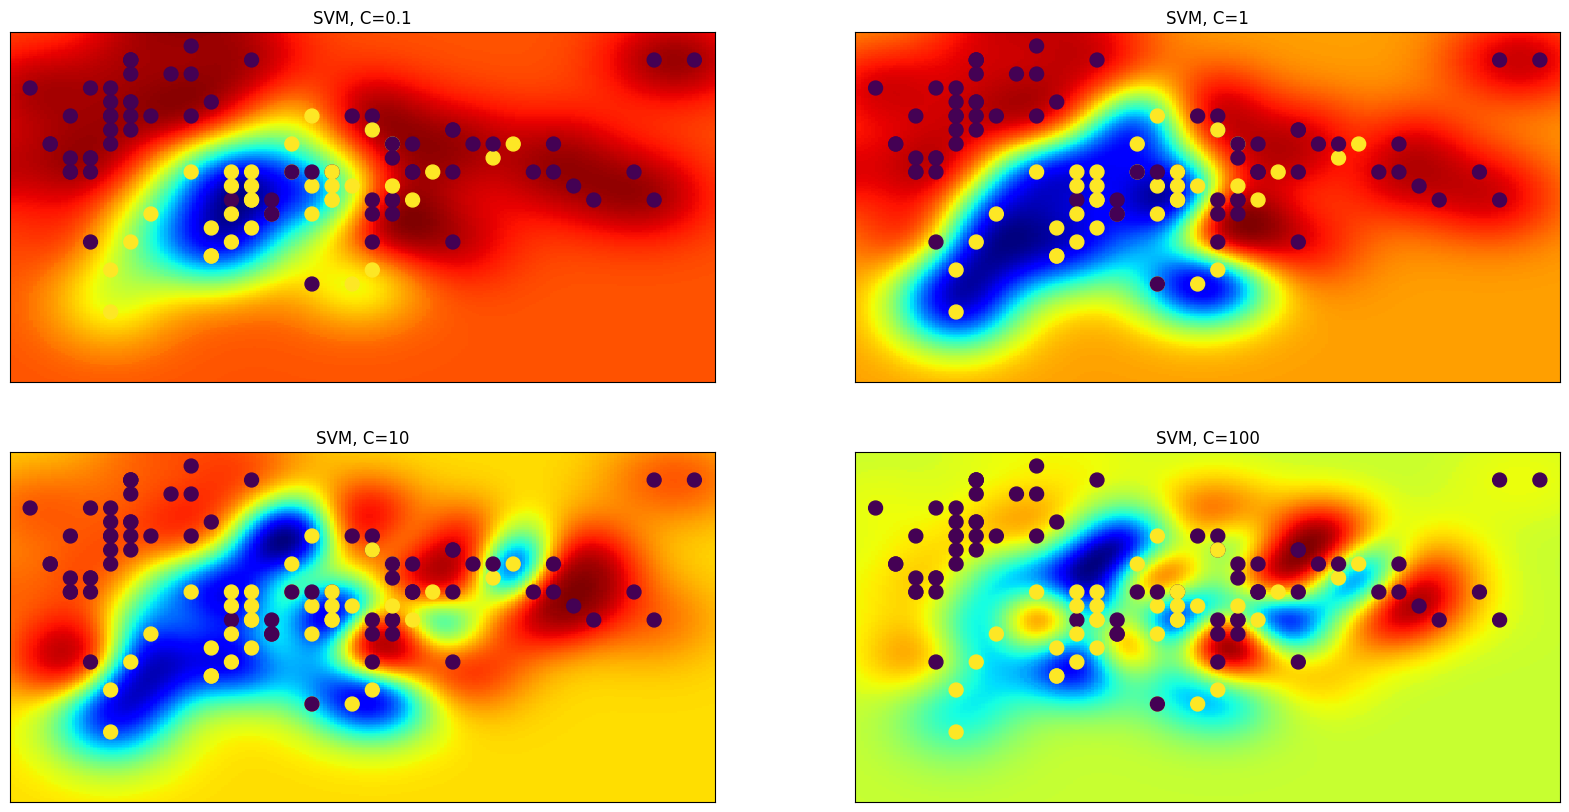

In [131]:
# visualize the decision functions of the four different classifiers
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for clf, ax in zip(clfs, axes.ravel()):
    show_decision_function(clf, ax)
    ax.set_title(clf.name)

OH!

... and draw the ROC curves.

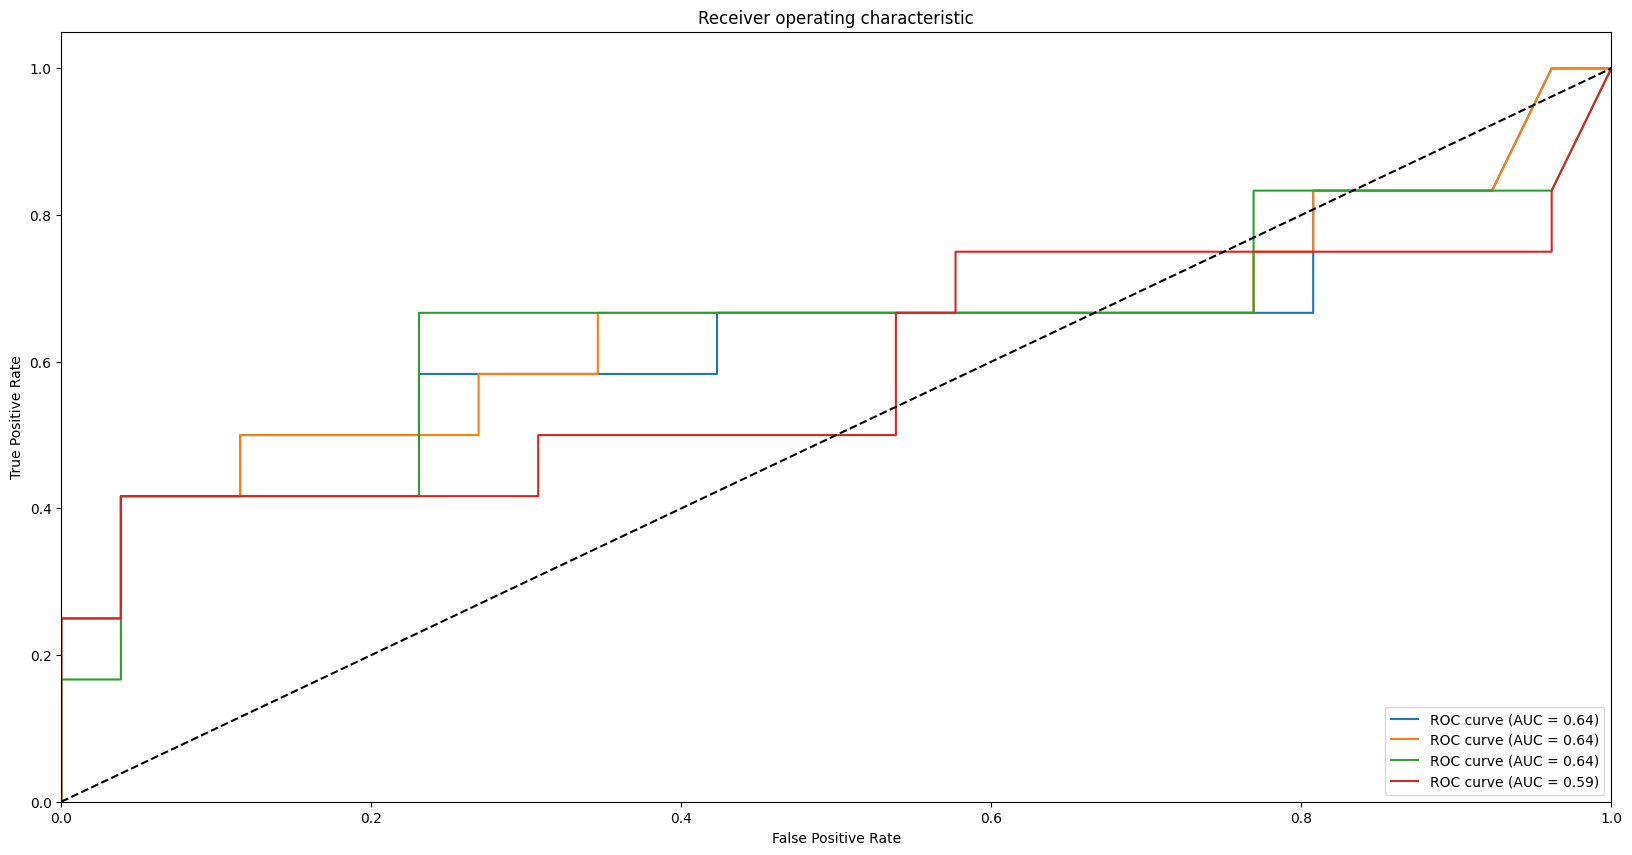

In [132]:
# draw the roc curves:

fprs, tprs = [], []

for clf in clfs:
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=1)
    fprs.append(fpr)
    tprs.append(tpr)
    
plot_roc_curves(fprs, tprs)

## 2. Hyperparameter Tuning

Many models have hyperparameters, **parameters that can't directly be estimated from the data**. They have to be manually tuned by the practioner, because there is no analytical formula available to calculate an appropriate value. One example is the regularization parameter $C$ in SVMs.

#### Exercise 2.1 (Nested cross-validation)

Train a SVM classifier for the detection of iris versicolor again, but this time with a proper tuning of the regularization parameter $C$ (you may set the gamma parameter to 10 again). Select a reasonable range of parameter values for $C$ and implement a nested cross-validation (as shown on the slides) by yourself. 

You can use the following helper function that creates a list of masks. Each mask can be used as an index set to select the test samples. The function accepts the number of samples *num_samples* in the dataset and the desired number of folds *k* as input parameters. Since the data is sorted by the labels the k-fold CV will likely have trouble with class imbalances in the some cases. So you should randomly shuffle the data before applying the masks.

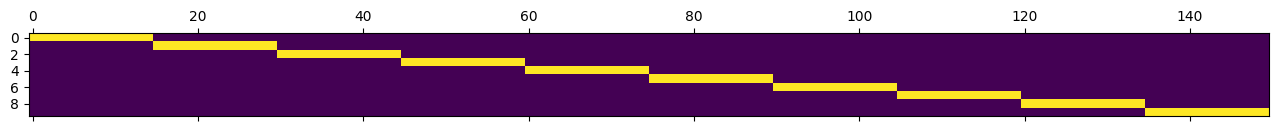

In [133]:
# helper function to create k-fold train-test-splits
def create_kfold_mask(num_samples, k): # 데이터셋을 k개로 나눔!
    masks = []
    fold_size = num_samples / k
    
    for i in range(k):
        mask = np.zeros(num_samples, dtype=bool)
        mask[i*int(fold_size):(i+1)*int(fold_size)] = True
        masks.append(mask)
        
    return masks # test set = True, train set = False

# visualization of the splits created by 'create_kfold_mask'
masks = create_kfold_mask(150, 10)
plt.matshow(masks)

In [134]:
####################
# INSERT CODE HERE #
####################

indices = np.random.permutation(len(X_versi)) # randomly shuffle the data
X_versi = X_versi[indices]
y_versi = y_versi[indices]

inner_masks = create_kfold_mask(135, 10) # create 10-fold masks for the inner loop

acc = []
fprs, tprs = [], []

for mask in masks:
    # train = False, test = True
    outer_X_train, X_test = X_versi[~mask], X_versi[mask] 
    outer_y_train, y_test = y_versi[~mask], y_versi[mask]
    
    for inner_mask in inner_masks:
        # train = False, test = True
        X_train, X_val = outer_X_train[~inner_mask], outer_X_train[inner_mask]
        y_train, y_val = outer_y_train[~inner_mask], outer_y_train[inner_mask]
        
        for C in [0.1, 1, 10, 100]:
            clf_svm = SVC(gamma=10, C=C, probability=True)
            clf_svm.fit(X_train, y_train)
            predict = clf_svm.predict(X_val)
            acc.append(np.round(metrics.accuracy_score(y_val, predict),4))
            
            y_score = clf_svm.decision_function(X_val)
            fpr, tpr, _ = metrics.roc_curve(y_val, y_score, pos_label=1)
            fprs.append(fpr)
            tprs.append(tpr)
            
    clf_svm = SVC(gamma=10, C=1, probability=True)
    clf_svm.fit(X_train, y_train)
    
    predict = clf_svm.predict(X_test)
    acc.append(np.round(metrics.accuracy_score(y_test, predict),4))
    
train_size = X_train.shape[0]
test_size = X_test.shape[0]
  
print(f"training data size: {train_size}, test data size: {test_size}")     
print(f"k-fold cross-validation accuracy: {np.mean(acc)}") # k-fold cross-validation accuracy 출력

# this k-fold cross-validation can be used for outer loop of nested cross-validation
# this outer loop is used to evaluate the performance of the model




training data size: 135, test data size: 15
k-fold cross-validation accuracy: 0.78666


샘플링을 하고, innersampleing을 한 후에 파라미터를 tune함. 그리고 이 tuned parameter를 다시 이용함. 

1. 데이터셋을 k개의 폴드로 나눕니다 (외부 루프).
2. 각 폴드에 대해:
    a. 현재 폴드를 테스트 세트로 사용하고 나머지 폴드를 트레인 세트로 사용합니다.
    b. 트레인 세트를 다시 k개의 폴드로 나눕니다 (내부 루프).
    c. 내부 루프에서 하이퍼파라미터 튜닝을 수행하여 최적의 모델을 찾습니다.
    d. 최적의 모델을 외부 루프의 테스트 세트에 대해 평가합니다.
3. 모든 폴드에 대해 2의 과정을 반복하여 모델의 평균 성능을 계산합니다.